##### This notebook performs and evaluates different baseline algorithms
In more detail it performs the following clustering algorithm categories:
1. Density-based clustering algorithms
2. Spectral clustering algorithms

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, OPTICS, HDBSCAN, SpectralClustering, KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
data = pd.read_pickle('../data/feature_elimination_temps/correlation_training_df.pkl')
data

,id,sleep_points,exertion_points,altitude,calories,lightly_active_minutes,moderately_active_minutes,sedentary_minutes,steps,very_active_minutes,...,WORK/SCHOOL,badges,exercises,exercise_duration,is_weekend,is_holiday,day_sin,hour_sin,day_cos,hour_cos
0,621e2e8e67b776a24055b564,0.810469,0.622928,0.0,0.029382,0.254701,0.083045,0.495139,0.017563,0.080685,...,0.0,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.500000,0.574623,1.000000
1,621e2e8e67b776a24055b564,0.810469,0.622928,0.0,0.002914,0.254701,0.083045,0.495139,0.000000,0.080685,...,0.0,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.629410,0.574623,0.982963
2,621e2e8e67b776a24055b564,0.810469,0.622928,0.0,0.000729,0.254701,0.083045,0.495139,0.046184,0.080685,...,0.0,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.750000,0.574623,0.933013
3,621e2e8e67b776a24055b564,0.810469,0.622928,0.0,0.012860,0.254701,0.083045,0.495139,0.002661,0.080685,...,0.0,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.853553,0.574623,0.853553
4,621e2e8e67b776a24055b564,0.810469,0.622928,0.0,0.003315,0.254701,0.083045,0.495139,0.000000,0.080685,...,0.0,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.933013,0.574623,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159921,621e375b67b776a240290cdc,0.680095,0.720932,0.0,0.000383,0.000000,0.000000,0.490278,0.064983,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.350126,0.982963,0.020417,0.370590
159922,621e375b67b776a240290cdc,0.680095,0.720932,0.0,0.000383,0.000000,0.000000,0.490278,0.064983,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.350126,0.933013,0.020417,0.250000
159923,621e375b67b776a240290cdc,0.680095,0.720932,0.0,0.000383,0.000000,0.000000,0.490278,0.064983,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.350126,0.853553,0.020417,0.146447
159924,621e375b67b776a240290cdc,0.680095,0.720932,0.0,0.000383,0.000000,0.000000,0.490278,0.064983,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.350126,0.750000,0.020417,0.066987


Prepare data for clustering

In [3]:
user_id = data['id']
data.drop(columns=['id'], inplace=True)

##### 1. Perform multiple density-based clustering algorithms

Perform DBSCAN

In [ ]:
start = time.time()
print("Clustering with DBSCAN ... ")

# perform clustering
dbscan = DBSCAN(eps=3, min_samples=2)
y = dbscan.fit_predict(data)
dbscan_data = data.copy()
dbscan_data['cluster'] = y

# evaluate clustering results
print ("The Silhouette score is:", silhouette_score(data, y))
print ("The Davies-Bouldin Index is:", davies_bouldin_score(data, y))
print ("The Calinski-Harabasz Index is:", calinski_harabasz_score(data, y))

print("DBSCAN finished after", time.time() - start)

Clustering with DBSCAN ... 


In [ ]:
dbscan_data = pd.concat([user_id, dbscan_data], axis=1, ignore_index=True)
dbscan_data.to_csv('../data/clustering_results/dbscan_results.csv')

Perform OPTICS

In [ ]:
start = time.time()
print("Clustering with OPTICS ... ")

# perform clustering
optics = OPTICS(min_samples=2)
y = optics.fit_predict(data)
optics_data = data.copy()
optics_data['cluster'] = y

# evaluate clustering results
print ("The Silhouette score is:", silhouette_score(data, y))
print ("The Davies-Bouldin Index is:", davies_bouldin_score(data, y))
print ("The Calinski-Harabasz Index is:", calinski_harabasz_score(data, y))

print("OPTICS finished after", time.time() - start)

In [ ]:
optics_data = pd.concat([user_id, optics_data], axis=1, ignore_index=True)
optics_data.to_csv('../data/clustering_results/optics_results.csv')

Perform HDBSCAN

In [6]:
start = time.time()
print("Clustering with HDBSCAN ... ")

# perform clustering
hdbscan = HDBSCAN(min_cluster_size=100)
y = hdbscan.fit_predict(data)
hdbscan_data = data.copy()
hdbscan_data['cluster'] = y

# evaluate clustering results
print ("The Silhouette score is:", silhouette_score(data, y))
print ("The Davies-Bouldin Index is:", davies_bouldin_score(data, y))
print ("The Calinski-Harabasz Index is:", calinski_harabasz_score(data, y))

print("HDBSCAN finished after", time.time() - start)

Clustering with HDBSCAN ... 
The Silhouette score is: -0.055715805357403274
The Davies-Bouldin Index is: 2.0665128211784927
The Calinski-Harabasz Index is: 2565.3137153946623
HDBSCAN finished after 1968.430926322937


In [15]:
print("HDBSCAN detected", len(np.unique(y)), "clusters (including outliers).")

HDBSCAN detected 32 clusters (including outliers).


In [7]:
hdbscan_data = pd.concat([user_id, hdbscan_data], axis=1, ignore_index=True)
hdbscan_data.to_csv('../data/clustering_results/hdbscan_results.csv')

##### 2. Perform the spectral clustering algorithm

Perform Spectral clustering

In [ ]:
start = time.time()
print("Clustering with Spectral ... ")

# perform clustering
spectral = SpectralClustering(n_clusters=2, assign_labels='cluster_qr', random_state=0)
y = spectral.fit_predict(data)
spectral_data = data.copy()
spectral_data['cluster'] = y

# evaluate clustering results
print ("The Silhouette score is:", silhouette_score(data, y))
print ("The Davies-Bouldin Index is:", davies_bouldin_score(data, y))
print ("The Calinski-Harabasz Index is:", calinski_harabasz_score(data, y))

print("Spectral finished after", time.time() - start)

In [ ]:
spectral_data = pd.concat([user_id, spectral_data], axis=1, ignore_index=True)
spectral_data.to_csv('../data/clustering_results/spectral_results.csv')

##### K-means

In [ ]:
start = time.time()
print("Clustering with K-means ... ")

# perform clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
y = kmeans.fit_predict(data)
kmeans_data = data.copy()
kmeans_data['cluster'] = y

# evaluate clustering results
print ("The Silhouette score is:", silhouette_score(data, y))
print ("The Davies-Bouldin Index is:", davies_bouldin_score(data, y))
print ("The Calinski-Harabasz Index is:", calinski_harabasz_score(data, y))

print("K-means finished after", time.time() - start)

In [ ]:
kmeans_data = pd.concat([user_id, kmeans_data], axis=1, ignore_index=True)
kmeans_data.to_csv('../data/clustering_results/kmeans_results.csv')

##### Visualize HDBSCAN results

In [33]:
data = pd.read_csv('../data/clustering_results/hdbscan_results.csv', index_col=0)
columns = pd.read_pickle('../data/feature_elimination_temps/correlation_training_df.pkl')
columns = list(columns.columns)
columns.append('cluster')
data.set_axis(columns, axis="columns", inplace=True)
data

C:\Users\evapa\AppData\Local\Temp\ipykernel_24244\1325013170.py:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data.set_axis(columns, axis="columns", inplace=True)


,id,sleep_points,exertion_points,altitude,calories,lightly_active_minutes,moderately_active_minutes,sedentary_minutes,steps,very_active_minutes,...,badges,exercises,exercise_duration,is_weekend,is_holiday,day_sin,hour_sin,day_cos,hour_cos,cluster
0,621e2e8e67b776a24055b564,0.810469,0.622928,0.0,0.029382,0.254701,0.083045,0.495139,0.017563,0.080685,...,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.500000,0.574623,1.000000,16
1,621e2e8e67b776a24055b564,0.810469,0.622928,0.0,0.002914,0.254701,0.083045,0.495139,0.000000,0.080685,...,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.629410,0.574623,0.982963,16
2,621e2e8e67b776a24055b564,0.810469,0.622928,0.0,0.000729,0.254701,0.083045,0.495139,0.046184,0.080685,...,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.750000,0.574623,0.933013,-1
3,621e2e8e67b776a24055b564,0.810469,0.622928,0.0,0.012860,0.254701,0.083045,0.495139,0.002661,0.080685,...,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.853553,0.574623,0.853553,-1
4,621e2e8e67b776a24055b564,0.810469,0.622928,0.0,0.003315,0.254701,0.083045,0.495139,0.000000,0.080685,...,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.933013,0.574623,0.750000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159921,621e375b67b776a240290cdc,0.680095,0.720932,0.0,0.000383,0.000000,0.000000,0.490278,0.064983,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.350126,0.982963,0.020417,0.370590,-1
159922,621e375b67b776a240290cdc,0.680095,0.720932,0.0,0.000383,0.000000,0.000000,0.490278,0.064983,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.350126,0.933013,0.020417,0.250000,-1
159923,621e375b67b776a240290cdc,0.680095,0.720932,0.0,0.000383,0.000000,0.000000,0.490278,0.064983,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.350126,0.853553,0.020417,0.146447,-1
159924,621e375b67b776a240290cdc,0.680095,0.720932,0.0,0.000383,0.000000,0.000000,0.490278,0.064983,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.350126,0.750000,0.020417,0.066987,-1


In [34]:
clusters = data['cluster']
print(clusters.nunique())
data.drop(columns=['id', 'cluster'], inplace=True)
data

32


,sleep_points,exertion_points,altitude,calories,lightly_active_minutes,moderately_active_minutes,sedentary_minutes,steps,very_active_minutes,minutes_below_zone_1,...,WORK/SCHOOL,badges,exercises,exercise_duration,is_weekend,is_holiday,day_sin,hour_sin,day_cos,hour_cos
0,0.810469,0.622928,0.0,0.029382,0.254701,0.083045,0.495139,0.017563,0.080685,0.936806,...,0.0,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.500000,0.574623,1.000000
1,0.810469,0.622928,0.0,0.002914,0.254701,0.083045,0.495139,0.000000,0.080685,0.936806,...,0.0,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.629410,0.574623,0.982963
2,0.810469,0.622928,0.0,0.000729,0.254701,0.083045,0.495139,0.046184,0.080685,0.936806,...,0.0,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.750000,0.574623,0.933013
3,0.810469,0.622928,0.0,0.012860,0.254701,0.083045,0.495139,0.002661,0.080685,0.936806,...,0.0,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.853553,0.574623,0.853553
4,0.810469,0.622928,0.0,0.003315,0.254701,0.083045,0.495139,0.000000,0.080685,0.936806,...,0.0,0.0,0.074074,0.001865,0.0,0.0,0.005131,0.933013,0.574623,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159921,0.680095,0.720932,0.0,0.000383,0.000000,0.000000,0.490278,0.064983,0.000000,0.736277,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.350126,0.982963,0.020417,0.370590
159922,0.680095,0.720932,0.0,0.000383,0.000000,0.000000,0.490278,0.064983,0.000000,0.736277,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.350126,0.933013,0.020417,0.250000
159923,0.680095,0.720932,0.0,0.000383,0.000000,0.000000,0.490278,0.064983,0.000000,0.736277,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.350126,0.853553,0.020417,0.146447
159924,0.680095,0.720932,0.0,0.000383,0.000000,0.000000,0.490278,0.064983,0.000000,0.736277,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.350126,0.750000,0.020417,0.066987


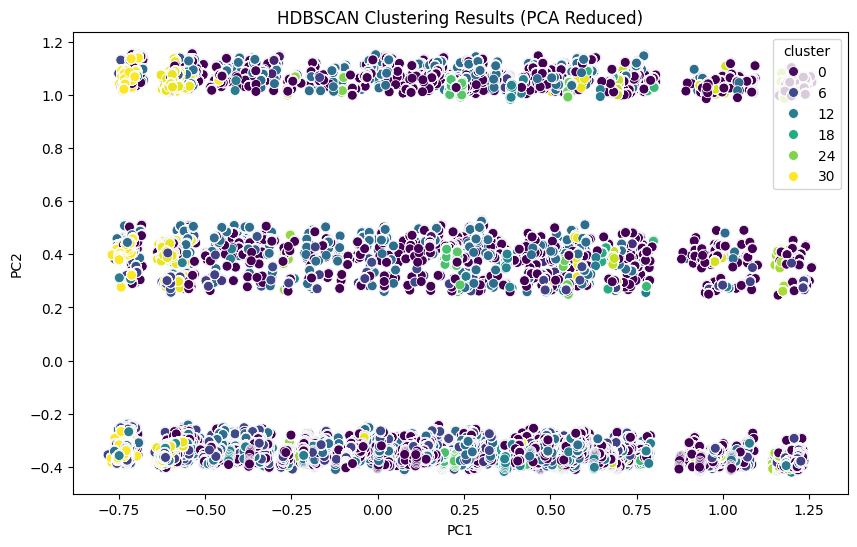

In [32]:
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
df['cluster'] = clusters

# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df, palette='viridis', s=50)
plt.title('HDBSCAN Clustering Results (PCA Reduced)')
plt.show()